# Furniture Data Analysis

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data from csv file

df = pd.read_csv("../DATA/furniture_data.csv")
df.head()

,Product,Sale Price,Cost per Product,Quantity,Total Revenue
0,Sofa,800,600,32,25600
1,Chair,300,200,12,3600
2,Table,500,300,41,20500
3,Bed,1000,700,23,23000
4,Wardrobe,800,600,19,15200


In [3]:
# Check length of data frame
len(df)

16

In [4]:
# Number of duplicates in Product column
df['Product'].duplicated().sum()

6

In [5]:
# Each product count 
df_product = df.pivot_table(index='Product',aggfunc='size')
df_product

Product
Bed             1
Bookshelf       2
Chair           1
Coffee Table    2
Dresser         2
Ottoman         2
Rug             2
Sofa            1
Table           1
Wardrobe        2
dtype: int64

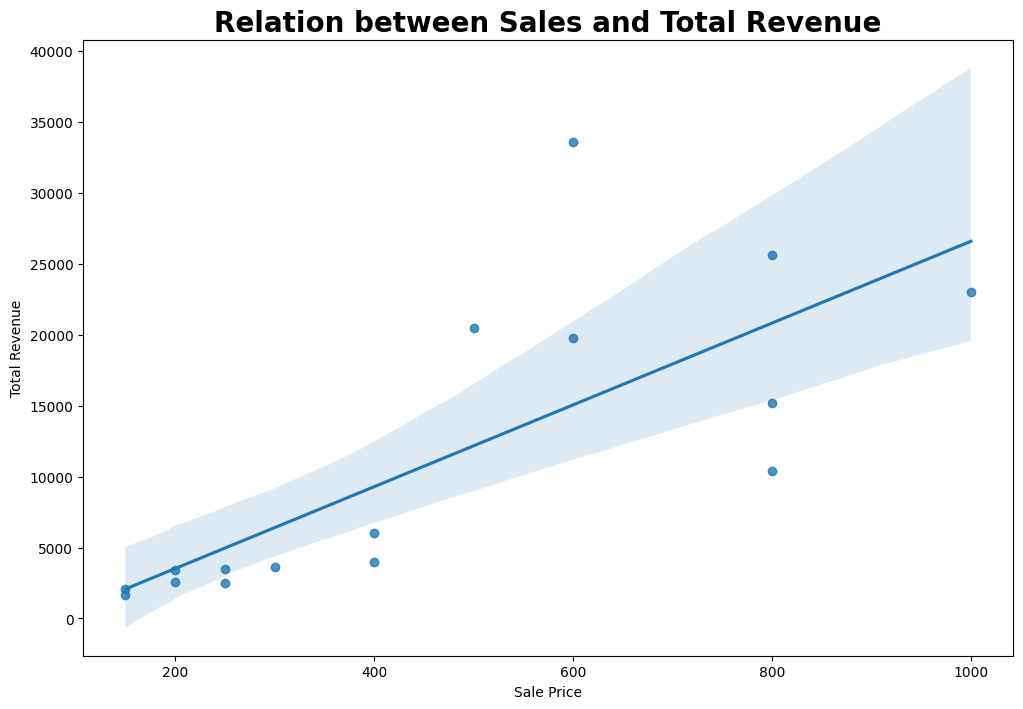

In [6]:
# Regplot of price and total revenue

fig,ax = plt.subplots(figsize=(12,8))
sns.regplot(data=df,x='Sale Price',y='Total Revenue',
            ax=ax)
plt.title(label="Relation between Sales and Total Revenue",
          fontdict={"fontsize":20,"fontweight":"bold"})
plt.show()

In [7]:
# Difference in revenue between wardrobes and beds
by_product = df.groupby(by="Product")["Total Revenue"].sum()

# Revenue of wardrobes
wardrobes_revenue = by_product.loc['Wardrobe']
# Revenue of beds
beds_revenue = by_product.loc['Bed']

diff_revenue = wardrobes_revenue - beds_revenue
print(f"The difference in revenue between wardrober and beds is ${diff_revenue}")

The difference in revenue between wardrober and beds is $2600


In [8]:
# Column of Total Cost
df['Total Cost'] = df['Cost per Product'] * df['Quantity']
df.head()


,Product,Sale Price,Cost per Product,Quantity,Total Revenue,Total Cost
0,Sofa,800,600,32,25600,19200
1,Chair,300,200,12,3600,2400
2,Table,500,300,41,20500,12300
3,Bed,1000,700,23,23000,16100
4,Wardrobe,800,600,19,15200,11400


In [9]:
# # Or
# Total_Cost = df['Cost per Product'] * df['Quantity']

# df.insert(loc=4,column="Total Cost",value=Total_Cost)
# df.head()

In [10]:
# Compute the profit column
df["Profit"] = df['Total Revenue'] - df['Total Cost']

# Group data by product
grouped_products = df.groupby(by='Product')[['Total Revenue','Profit']].sum()

# Compute the profit margin column
grouped_products['Profit Margin'] = (grouped_products['Profit']/grouped_products['Total Revenue'])*100

# Sort data by profit margin and return first result
grouped_products.sort_values(by="Profit Margin", ascending=True).head(1)

,Total Revenue,Profit,Profit Margin
Product,,,
Dresser,53400,8900,16.666667
